In [96]:
# imports
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
plt.style.use('seaborn')
pandas.set_option('precision', 3)
simplefilter(action='ignore', category=FutureWarning)

In [97]:
df = pandas.read_csv('creditcard.csv')

In [98]:
# sample data
df.sample(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53914,46211.0,-0.529,1.000,-0.658,-0.238,2.370,3.415,-0.142,1.259,-0.959,...,0.154,0.188,-0.142,1.007,-0.075,-0.318,0.051,0.085,10.89,0
283803,171889.0,-1.584,1.264,1.646,-0.752,0.192,0.217,0.588,-0.310,0.964,...,-0.172,-0.594,-0.263,0.524,0.275,-0.553,-0.961,-0.031,14.99,0
91349,63427.0,-1.328,-0.129,0.734,-0.342,-0.766,0.354,1.079,0.069,-1.317,...,-0.426,-0.672,-0.004,-0.325,-0.252,-0.651,-0.084,-0.308,254.80,0
118688,75174.0,1.028,-0.101,0.688,1.407,-0.473,0.204,-0.254,0.234,0.362,...,0.043,0.260,-0.098,0.237,0.569,-0.273,0.039,0.014,40.00,0
195020,130863.0,0.183,1.061,-1.435,0.505,1.302,-0.622,1.392,-0.665,-0.462,...,0.318,1.248,-0.113,-0.970,-0.687,-0.068,-0.039,0.252,23.59,0
99417,67110.0,1.216,0.170,-0.254,0.841,0.180,0.140,-0.184,0.102,0.670,...,-0.210,-0.332,-0.167,-0.833,0.580,0.494,0.016,0.031,12.31,0
48269,43571.0,1.133,-0.660,0.590,-0.150,-0.493,1.065,-0.856,0.445,1.129,...,-0.216,-0.480,-0.072,-1.093,0.150,1.026,-0.035,-0.006,46.90,0
160275,113194.0,-0.932,0.011,2.228,-2.261,-0.736,-0.762,0.019,0.188,-1.062,...,0.006,-0.149,-0.119,0.492,0.322,-0.481,0.246,0.114,28.00,0
30036,35748.0,1.147,-0.567,0.976,0.086,-1.103,0.108,-0.809,0.280,1.136,...,-0.203,-0.465,0.021,0.060,0.104,0.946,-0.050,0.002,31.00,0
224070,143638.0,-3.235,-1.619,-2.405,-3.072,-2.313,-0.935,1.773,0.054,-0.319,...,-0.426,0.196,0.044,0.166,0.741,-0.747,-0.510,-0.618,442.79,0


Most of the features of the data has been anonymized (V1 to V28) except the time of transaction, its amount and whether it is fraudulent or not.

In [99]:
# summary of the time and amount features
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


#### Data Visualisation

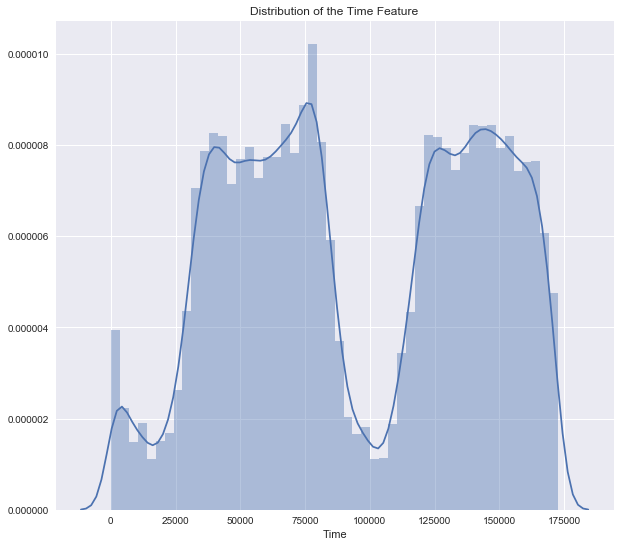

In [100]:
# visualising the time distribution
plt.figure(figsize=(10,9))
plt.title('Distribution of the Time Feature')
sns.distplot(df['Time'])

There are significant peaks and lows in the time distribution indicating the huge difference between the number of transactions occuring during the day and night.

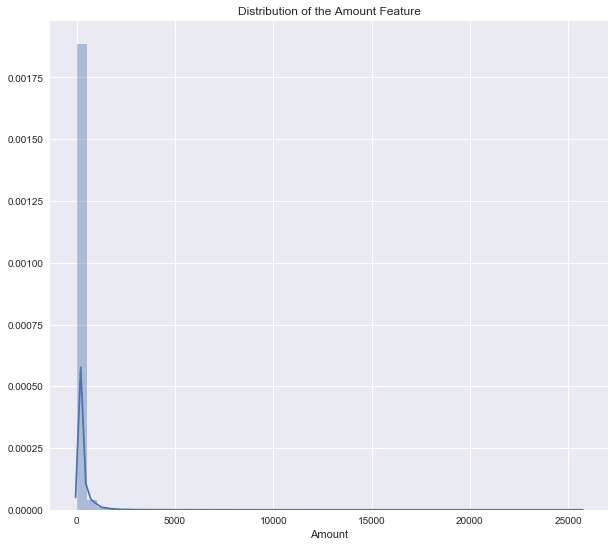

In [101]:
# Visualising the amount distribution
plt.figure(figsize=(10,9))
plt.title('Distribution of the Amount Feature')
sns.distplot(df['Amount'])

While the mean of the transaction amount stands at \\$88.35, the maximum amount is \\$25691.16. But the data is heavily skewed and most of the transactions are low valued.

In [102]:
counts = df['Class'].value_counts()
correct = counts[0]
fraudulent = counts[1]
correct_perc = (correct/(correct+fraudulent))*100
fraudulent_perc = (fraudulent/(correct+fraudulent))*100
print('There are {} ({:.3f}%) non-fraudulent transactions and {} ({:.3f}%) fraudulent transactions.'.format(correct, correct_perc, fraudulent, fraudulent_perc))

There are 284315 (99.827%) non-fraudulent transactions and 492 (0.173%) fraudulent transactions.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

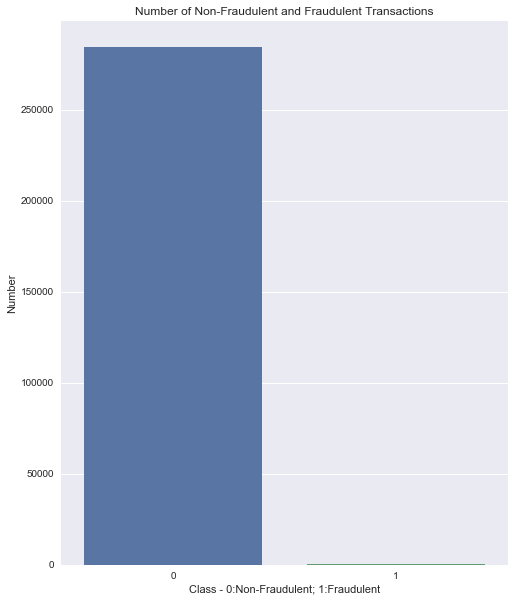

In [103]:
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

More than 99% of the transactions are non-fraudulent. So, our dataset is heavily imbalanced.

Text(0.5, 1.0, 'Heatmap of Correlation')

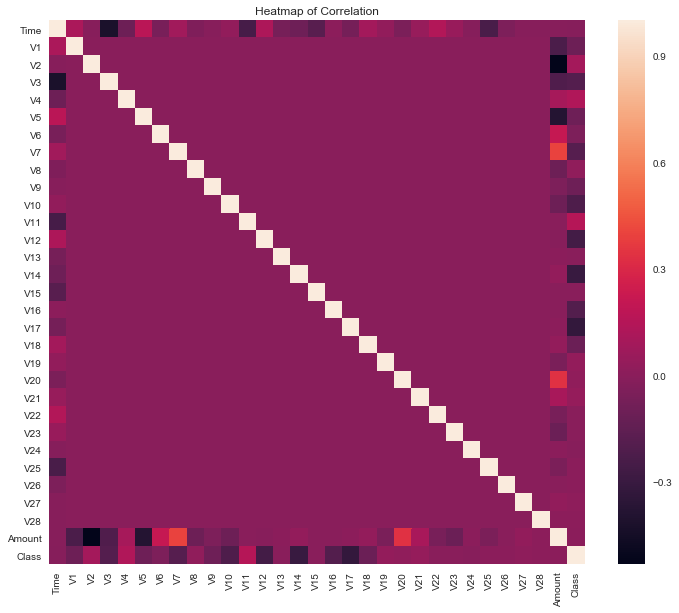

In [104]:
# heatmap of correlation between the predictor variables
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

Some of the predictors do seem to be correlated with the Class variable but there seem to be relatively little significant correlations for such a large number of variables.

#### Scaling the Time and Amount features 

In [105]:
from sklearn import preprocessing

# scale the time column
scaler_time = preprocessing.StandardScaler().fit(df[['Time']])
scaled_time = scaler_time.transform(df[['Time']])
scaled_time = scaled_time.flatten()

# scale the amount column
scaler_amount = preprocessing.StandardScaler().fit(df[['Amount']])
scaled_amount = scaler_amount.transform(df[['Amount']])
scaled_amount = scaled_amount.flatten()

In [106]:
# insert the scaled time and amount columns  
df.insert(0, "scaled_amount", scaled_amount, True)
df.insert(0, "scaled_time", scaled_time, True)

# delete the old time and amount columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [107]:
df.sample(5)

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245380,1.220,0.487,-4.338,-1.240,-1.777e+00,1.026,2.253,-1.008,0.805,-0.125,...,-1.018,-0.649,-0.483,-2.707,0.373,1.037,-0.452,0.492,-1.771e+00,0
38171,-1.169,-0.241,1.323,-0.752,8.457e-01,-0.521,-1.580,-0.766,-0.912,-0.062,...,-0.466,-0.192,-0.108,0.011,0.414,0.121,1.154,-0.036,1.843e-02,0
47571,-1.086,-0.232,1.242,-0.214,9.859e-04,-1.404,-0.432,-1.006,0.084,-0.278,...,0.035,0.120,0.531,-0.135,0.194,0.608,0.153,0.013,1.372e-02,0
251012,1.271,-0.293,2.388,-1.284,-1.845e+00,-1.978,-0.425,-0.295,-0.870,-0.198,...,-0.405,0.029,0.533,-0.109,-1.377,0.235,0.137,-0.021,-8.543e-02,0
14146,-1.467,-0.313,1.629,-0.832,1.043e-02,-1.454,-0.755,-0.168,-1.012,-0.261,...,-0.309,-0.455,-0.635,-0.127,-1.078,0.565,-0.159,0.005,6.634e-04,0


We need to scale only the Time and Amount features as all the other features (V1 to V28) were prepared using PCA.

#### Splitting the dataset into training and test data

In [108]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [109]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

#### Using SMOTE to remove data imbalance

In [110]:
X_train = train.loc[:,:'V28']
y_train = train.loc[:,'Class']

In [111]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [112]:
train_res = np.concatenate((X_train_res, y_train_res.reshape((-1,1))), axis = 1)
np.random.shuffle(train_res)
train_res = pandas.DataFrame(train_res, columns=train.columns)

Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

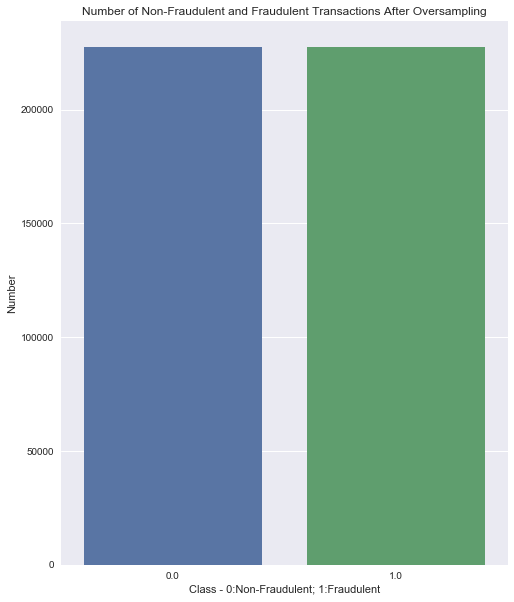

In [113]:
counts = train_res['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

#### Outlier Detection and Removal

In [114]:
corr = train_res.corr()
corr = corr[['Class']]

In [115]:
# features with high negative correlations
corr[corr['Class'] < -0.5]

,Class
V3,-0.571
V9,-0.577
V10,-0.635
V12,-0.689
V14,-0.758
V16,-0.609
V17,-0.577


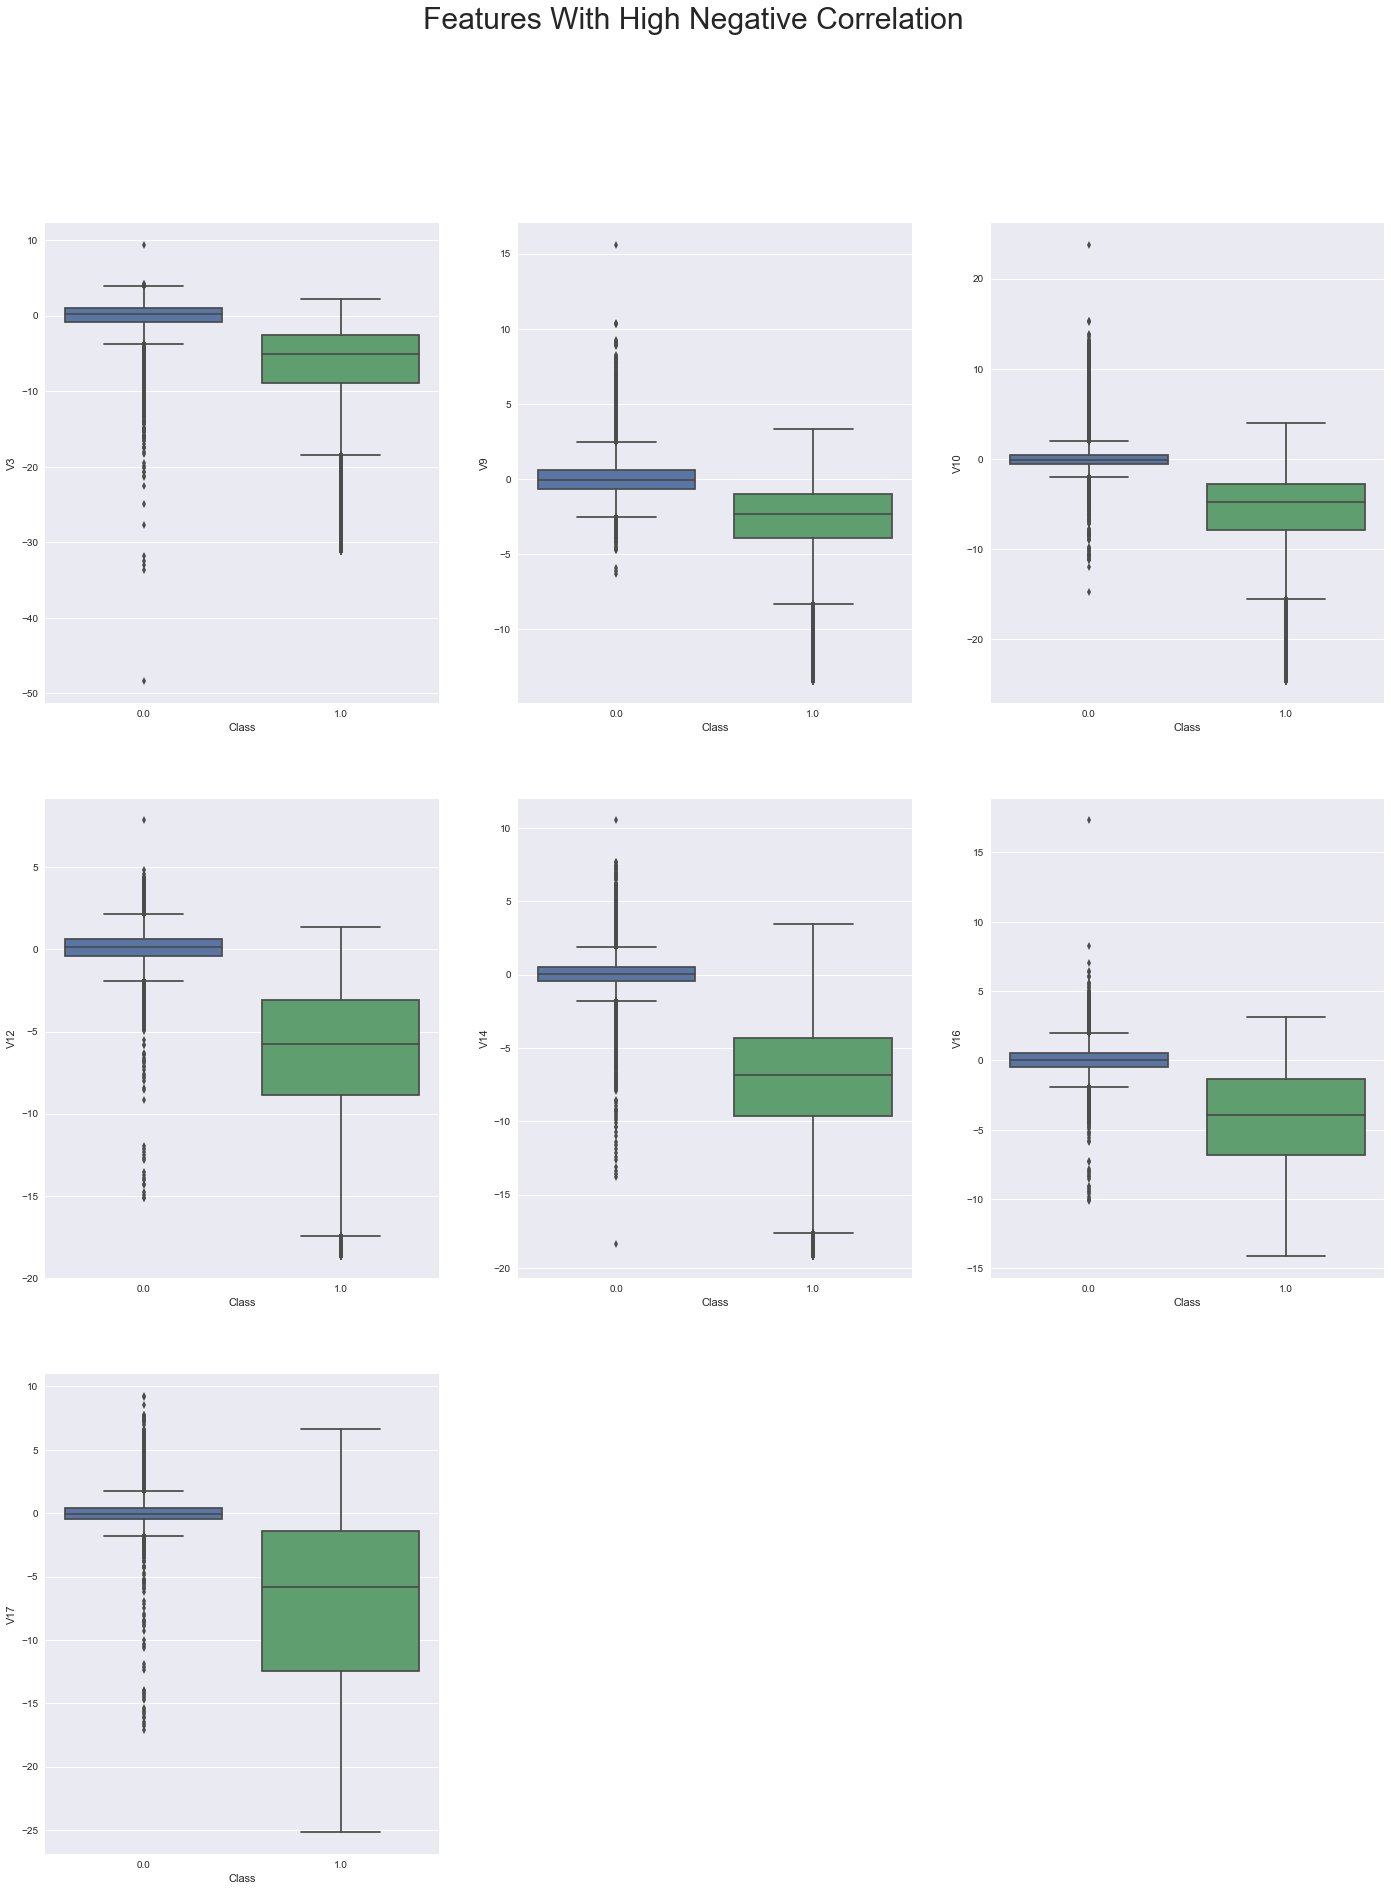

In [116]:
# box plot of the features with high negative correlation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 30))
fig.suptitle('Features With High Negative Correlation', size=30)
sns.boxplot(x="Class", y="V3", data=train_res, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=train_res, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=train_res, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=train_res, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=train_res, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=train_res, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=train_res, ax=axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

In [117]:
# features with high positive correlations
corr[corr.Class > 0.5]

,Class
V2,0.510
V4,0.720
V11,0.697
Class,1.000


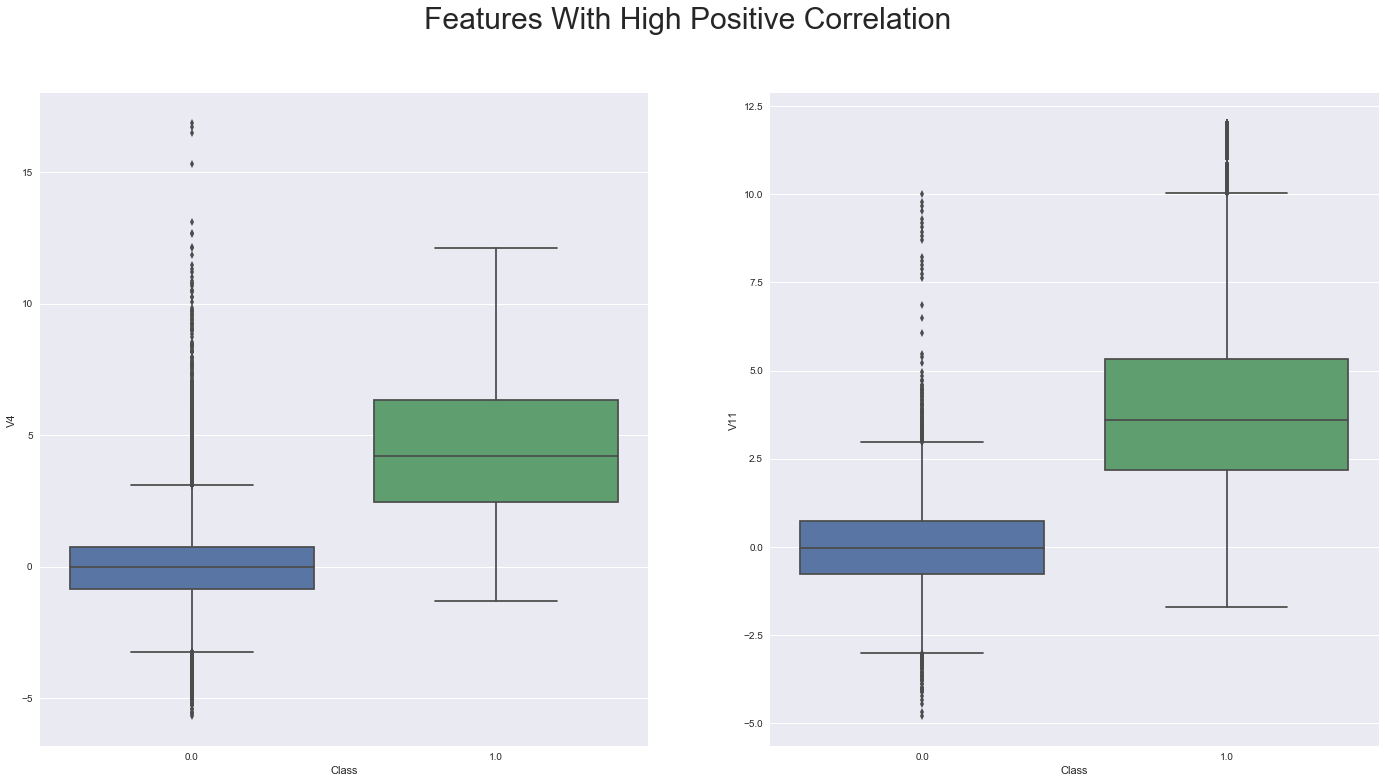

In [118]:
# box plot of the features with high positive correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
fig.suptitle('Features With High Positive Correlation', size=30)
sns.boxplot(x="Class", y="V4", data=train_res, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=train_res, ax=axes[1])

In [119]:
# removing extreme outliers
Q1 = train_res.quantile(0.25)
Q3 = train_res.quantile(0.75)
IQR = Q3 - Q1
train2 = train_res[~((train_res < (Q1-2.5*IQR)) | (train_res > (Q3+2.5*IQR))).any(axis=1)]

In [120]:
len_after = len(train2)
len_before = len(train_res)
len_diff = len(train_res) - len(train2)
print('We reduced our data size from {} observations by {} observations to {} observations.'.format(len_before, len_diff, len_after))

We reduced our data size from 454916 observations by 121524 observations to 333392 observations.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

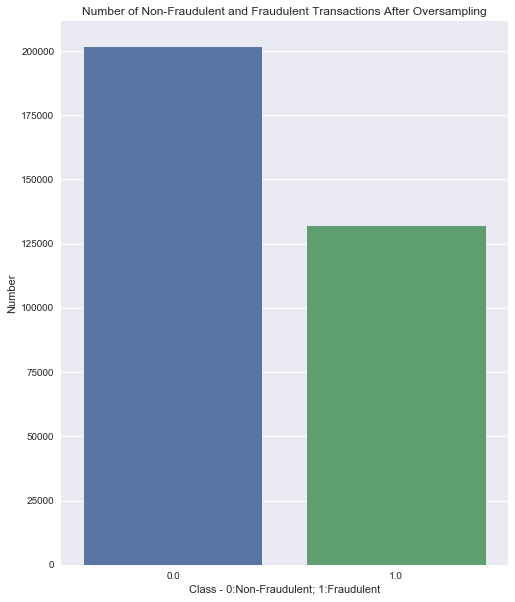

In [121]:
counts = train2['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

#### Visualising on 2D scatter plot using t-SNE

In [122]:
from sklearn.manifold import TSNE

subtrain2 = train2.sample(1000)
X = subtrain2.loc[:,:'V28']
y = subtrain2.loc[:,'Class']
X_tsne = TSNE(n_components=2, random_state=42, verbose=5).fit_transform(X.values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.012820
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 65.4220886, gradient norm = 0.2819089 (50 iterations in 0.353s)
[t-SNE] Iteration 100: error = 63.9896965, gradient norm = 0.2589646 (50 iterations in 0.349s)
[t-SNE] Iteration 150: error = 64.3916626, gradient norm = 0.2558551 (50 iterations in 0.328s)
[t-SNE] Iteration 200: error = 64.2604980, gradient norm = 0.2554580 (50 iterations in 0.332s)
[t-SNE] Iteration 250: error = 64.1053238, gradient norm = 0.2419452 (50 iterations in 0.317s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.105324
[t-SNE] Iteration 300: error = 0.8575150, gradient norm = 0.0011415 (50 iterations in 0.284s)
[t-SNE] Iteration 350: error = 0.7476299, gradient norm = 0.00041

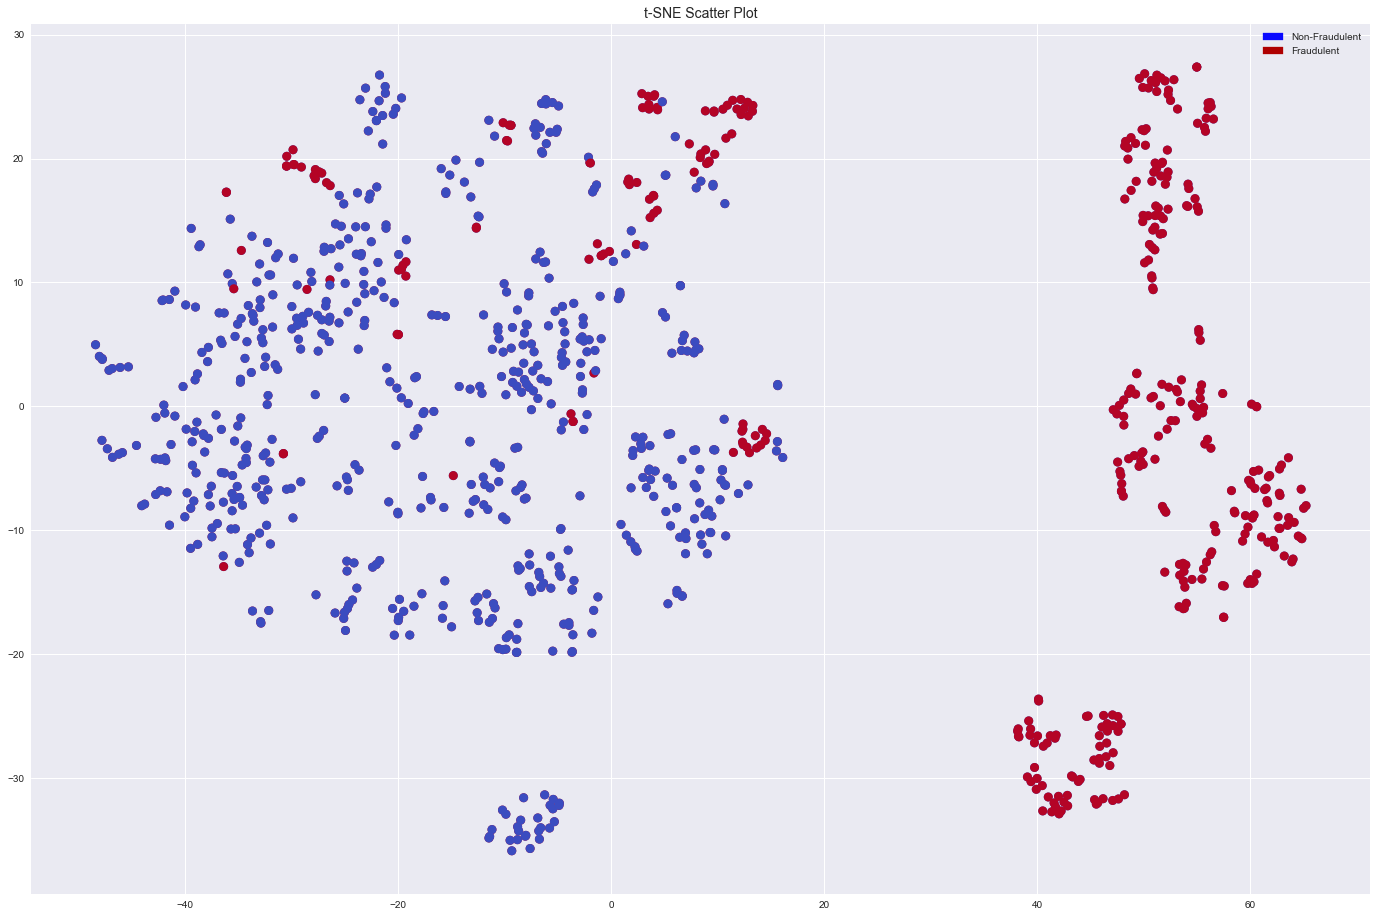

In [123]:
# scatter plot
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Non-Fraudulent')
red_patch = mpatches.Patch(color='#AF0000', label='Fraudulent')

ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Fraudulent', linewidths=2)
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraudulent', linewidths=2)
ax.set_title('t-SNE Scatter Plot', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])

#### Classification using XGBoost

In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [131]:
subtrain2 = train2.sample(20000)
X_train = subtrain2.loc[:,:'V28']
y_train = subtrain2.loc[:,'Class']
X_test = test.loc[:,:'V28'].values
y_test = test.loc[:,'Class'].values

In [133]:
kfold = KFold(n_splits=10, random_state=42)
clf = XGBClassifier(objective ='reg:logistic')
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='roc_auc')
print('XGB ROCAUC on validation data: {0:.5f} {1:.5f}'.format(cv_results.mean(), cv_results.std()))

XGB ROCAUC on validation data: 0.99900 0.00022


In [134]:
clf.fit(X_train.as_matrix(), y_train.as_matrix(), eval_metric='auc', verbose=True)
y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("XGB ROCAUC on test data: %f" % (roc_auc))

XGB ROCAUC on test data: 0.941833


In [135]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [136]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

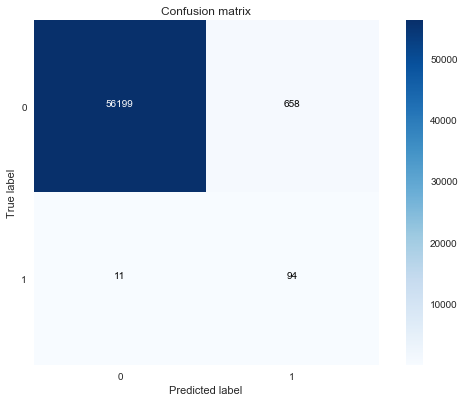

In [138]:
# plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.grid(False)
plt.show()